# Entscheidungsbaum



```{admonition} Lernziele
:class: hint
* Sie wissen, was ein **Entscheidungsbaum** ist und kennen die zugehörigen Fachbegriffe **Node**, **Branch** und **Leaf**.
* Sie können selbst bei einem kleinen Datensatz einen Entscheidungsbaum erstellen.
* Sie können mit Scikit-Learn einen Entscheidungsbaum trainieren lassen.
* Sie können die visuelle Darstellung eines Entscheidungsbaums interpretieren und eine Prognose treffen.
* Sie wissen, dass der Entscheidungsbaum zu Overfitting neigt und können seine Hyperparameter (z.B. die Baumtiefe) feinjustieren.
```

## Wer bin ich?

Ein beliebtes Partyspiel ist das Spiel "Wer bin ich?". Die Spielregel sind
simpel. Eine Person wählt eine berühmte Person oder eine Figur aus einem Film
oder Buch, die die Mitspieler:innen erraten müssen. Die Mitspieler:innen
dürfen jedoch nur Fragen stellen, die mit "Ja" oder "Nein" beantwortet werden. 

Hier ist ein Beispiel, wie eine typische Runde von "Wer bin ich?" ablaufen
könnte:

* Spieler 1: Bin ich männlich?
* Spieler 2: Ja.
* Spieler 3: Bist du ein Schauspieler?
* Spieler 1: Nein.
* Spieler 4: Bist du ein Musiker?
* Spieler 1: Ja.
* Spieler 5: Bist du Michael Jackson?
* Spieler 1: Ja! Richtig!

Als nächstes wäre jetzt Spieler 5 an der Reihe, sich eine Person oder Figur
auszuwählen, die die anderen Spieler erraten sollen. Vielleicht kennen Sie auch
die umgekehrte Variante. Der Name der zu ratenden Person/Figur wird der Person
mit einem Zettel auf die Stirn geklebt. Und nun muss die Person raten, während
die Mitspieler:innen mit Ja/Nein antworten.

Dieser Partyklassiker lässt sich auch auf die Entscheidungsfindung bei Problemen
übertragen. 

## Ein Entscheidungsbaum im Autohaus

Im Folgenden betrachten wir ein fiktives Beispiel, um händisch einen sogenannten
**Entscheidungsbaum** zu erstellen. In einem Autohaus vereinbaren zwölf Personen
eine Probefahrt. In der folgenden Tabelle ist notiert, welchen 

* Zustand (neu oder gebraucht),
* Marke (Audi, BMW und Citroën) und
* Preis (in EUR)

das jeweilige Auto hat. In der vierten Spalte (= Kaufentscheidung) steht, ob
anschließend das Auto gekauft wurde oder nicht. Wir lesen mit Pandas
die Daten aus der csv-Tabelle `autokauf.csv` ein:

In [1]:
import pandas as pd 

data = pd.read_csv('autokauf.csv')
data.head(12)

,Zustand,Marke,Preis,Kaufentscheidung
0,neu,Citroën,10000,ja
1,gebraucht,Citroën,13000,nein
2,gebraucht,BMW,16000,nein
3,gebraucht,Audi,11000,ja
4,neu,BMW,17000,nein
5,neu,BMW,13000,ja
6,gebraucht,Audi,15000,ja
7,gebraucht,Citroën,13000,nein
8,neu,BMW,11000,ja
9,neu,Audi,14000,ja


Da in unserem Beispiel nur drei Features vorliegen, können wir die Daten
visualisieren. Wir ordnen der x-, y- und z-Achse jeweils eine Eigenschaft zu und
visualisieren die Kaufentscheidung durch die Farbe des Markers. 

In [ ]:
#data.replace('neu', 1, inplace=True)
#data.replace('gebraucht', 0, inplace=True)

#data.replace('Audi', 0, inplace=True)
#data.replace('BMW', 1, inplace=True)
#data.replace('Citroën', 2, inplace=True)

#data.replace('ja', 1, inplace=True)
#data.replace('nein', 0, inplace=True)

#import plotly.express as px
#fig = px.scatter_3d(data, x='Zustand', y='Marke', z='Preis', color=data['Kaufentscheidung'],
#color_discrete_sequence=['#3b4cc0', '#b40426'])
#fig.write_html('autohaus_tabelle_3dscatter.html')

from IPython.display import HTML
HTML('autohaus_tabelle_3dscatter.html')


Natürlich können wir nun versuchen, eines der bisherigen ML-Verfahren
anzuwenden, um die Kaufentscheidung zu prognostizieren. Wir probieren an dieser
Stelle einen Entscheidungsbaum aus. Dazu betrachten wir uns die verschiedenen
Features und versuchen nacheinander anhand von Fragen an die Features die
einzelnen Datensätze in den einen Ast oder in den anderen Ast zu stecken.

Blättern Sie die folgenden Folien nacheinander durch, um zu sehen, welche Fragen
an die Features gestellt werden.

````{carousel}
:show_controls:
:show_shadows:

```{figure} pics/autokauf_tabelle_001.png
```

```{figure} pics/autokauf_tabelle_002.png
```

```{figure} pics/autokauf_tabelle_003.png
```

```{figure} pics/autokauf_tabelle_004.png
```

```{figure} pics/autokauf_tabelle_005.png
```

```{figure} pics/autokauf_tabelle_006.png
```
````

## Wurzel, Knoten, Zweig und Blatt

Die Abfolge von Fragen an die Features wird in der Regel visualisiert. Die
Visualisierung ist einer der großen Vorteile von Entscheidungsbäumen, denn
dadurch wird sehr deutlich, welche Entscheidungen zu dem Ergebnis führen. Die
Darstellung erfolgt dabei in der Regel als "mathematischer" Baum. Es gibt Knoten
(node) und Kanten (branch), manchmal auch Zweige genannt. Jeder Knoten im Baum
steht für eine Entscheidung oder ein Ereignis, während die Kanten zwischen den
Knoten die möglichen Auswirkungen dieser Entscheidungen oder Ereignisse
darstellen. Der oberste Knoten wird Wurzelknoten (root node) genannt. Ist die
Entscheidung gefällt, dann werden diese letzten Knoten Endknoten (leaf node)
genannt. Sie stellen sozusagen die Blätter des Baumes dar. 

## Entscheidungsbaum mit Scikit-Learn

Scikit-Learn bietet einen Algorithmus an, um einen Entscheidungsbaum zu
erstellen. Wir bleiben bei unserem fiktiven Autohaus. Allerdings müssen wir nun
die Klassenbezeichnungen wie beispielsweise 'neu' oder 'gebraucht' als Zahlen
kodieren. Danach extrahieren wir die drei Inputs als Matrix $X$ und unseren
Output als $y$.

In [2]:
# wandle Kategorien in Zahlen um
data.replace('neu', 1, inplace=True)
data.replace('gebraucht', 0, inplace=True)

data.replace('Audi', 0, inplace=True)
data.replace('BMW', 1, inplace=True)
data.replace('Citroën', 2, inplace=True)

data.replace('ja', 1, inplace=True)
data.replace('nein', 0, inplace=True)

# extrahiere X und y
X = data.loc[:, 'Zustand':'Preis']
y = data.loc[:, 'Kaufentscheidung']


In [3]:
data.head(12)

,Zustand,Marke,Preis,Kaufentscheidung
0,1,2,10000,1
1,0,2,13000,0
2,0,1,16000,0
3,0,0,11000,1
4,1,1,17000,0
5,1,1,13000,1
6,0,0,15000,1
7,0,2,13000,0
8,1,1,11000,1
9,1,0,14000,1


Nun lassen wir Scikit-Learn einen Entscheidungsbaum erstellen. Dazu importieren
wir `DecisionTreeClassifier` aus dem Untermodul `sklearn.tree`. Danach
trainieren wir den Entscheidungsbaum mit `.fit()`.

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y);

Aber wie sieht denn jetzt der Entscheidungsbaum aus? Das Scikit-Learn-Modul
`sklearn.tree` stellt auch eine Funktion namens `plot_tree` zur Verfügung, die
Entscheidungsbäume zeichnen kann. Wir importieren sie direkt und wenden Sie an.

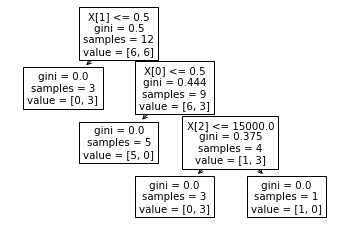

In [5]:
import matplotlib.pylab as plt
from sklearn.tree import plot_tree 

plt.figure()
plot_tree(model)
plt.show()

In den Kästchen, die den Wurzelknoten und die inneren Knoten darstellen, steht
jeweils in der ersten Zeile, welches Feature überprüft wird und wie die
dazugehörige Frage lautet. Bei unserem Wurzelknoten also `X[1] <= 0.5`. Das
bedeutet, das als erstes das 2. Feature, also die Marke benutzt wird. Die Marken
waren als Audi = 1, BMW = 2 und Citroën = 3 kodiert. Somit bedeutet diese
Entscheidung, dass Audis nach links und BMW/Citroën nach rechts gesteckt werden.
Damit ist der linke Ast schon beendet, alle Audis wurden nach der Probefahrt
gekauft.

Damit sich der Entscheidungsbaum leichter lesen lässt, können wir die Namen der
Features anstatt `X[0]`, `X[1]`und `X[2]` verwenden. Dazu setzen wir die Option
`feature_names=['Zustand','Marke','Preis']`.

In [ ]:
plt.figure()
plot_tree(model,feature_names=['Zustand','Marke','Preis'])
plt.show()

Der Eintrag `samples` in den Knoten verrät, wie viele Datensätze in den linken
Zweig wandern und wie viele nach rechts. Die drei Audis kommen nach links
(`samples = 3`) und die neun BMW/Citroëns (`samples = 9`) kommen nach rechts. 

Der linke Endknoten enthält nun drei Audis. Von diesen drei Audis werden am Ende
0 nicht gekauft und 3 gekauft. Das wird in der letzten Zeile beschrieben: `value
= [0, 3]`. Daher müssen keine weiteren Fragen gestellt werden. 

Die neun BMW/Citroëns enthalten aber noch Fahrzeuge mit beiden
Kaufentscheidungen. Der value wird mit `[6,3]` angegeben. Also befinden sich
noch 6 nicht gekaufte Fahrzeuge und 3 gekaufte Fahrzeuge in diesem Zweig. Wir
müssen weitere Fragen an die Features stellen, um diese Fahrzeuge korrekt zu
klassifizieren.

Daher wird nun nach dem Zustand des Fahrzeugs gefragt. `Zustand <= 0.5` meint
die Gebrauchtwagen, da wird die Klassenbezeichnung 'gebraucht' durch eine Null
ersetzt haben und 'neu' durch eine Eins. Links führt wieder zu einem Endknoten,
rechts zu einem gemischten Knoten. Es wäre schön, schneller erkennen zu können,
ob ein Knoten nur noch Autos mit einer Kaufentscheidung enthält, also ein reiner
Endknoten ist, oder ob der Knoten noch gemischt ist und somit ein innerer
Knoten. Dazu gibt es eine weitere Option, mit der wir die Kästchen farblich
füllen können. Sie lautet simpel: `filled=True`. 

Je dunkler die Farbe, desto reiner der Knoten!

In [ ]:
plt.figure()
plot_tree(model,feature_names=['Zustand','Marke','Preis'], filled=True)
plt.show()

Wenn wir uns die vier Endknoten, also die Blätter betrachten, so haben wir von
links nach rechts 3 Autos, die gekauft wurden (`[0,3]`), 5 Autos, die nicht
gekauft wurden (`[5,0]`), wiederum 3 Autos, die gekauft wurden (`[0,3]`) und
zuletzt 1 Auto, das nicht gekauft wurde (`[1,0]`). 

## Komplexität von Entscheidungsbäumen

Entscheidungsbäume tendieren schnell zum Overfitting. Natürlich können wir
solange weiter Fragen stellen, bis jedes Leaf/Endknoten nur noch Datenpunkte
einer Klasse enthält. Damit hätten wir also eine 100-prozentige Prognose auf den
Trainingsdaten. Wie so oft bedeutet dies aber nicht, dass der so trainierte
Entscheidungsbaum gut verallgemeinerbar ist.

Um das Overfitting zu vermeiden, werden vor allem zwei Methoden verwendet:
**Prä-Tuning** und **Post-Tuning**.

1. Prä-Pruning: die maximale Tiefe des Baumes wird begrenzt oder es wird eine
   bestimmte Mindestanzahl von Datenpunkten pro Knoten gefordert
2. Post-Pruning: im Nachhinein werden Knoten mit wenig Informationen aus dem
   Entscheidungsbaum entfernt oder Knoten werden zusammengelegt

Scikit-Learn hat nur Prä-Pruning implementiert. Beispielsweise können wir mit
dem Argument `max_depth=2` die Tiefe unseres Entscheidungsbaumes auf 2
begrenzen.


In [ ]:
model_begrenzt = DecisionTreeClassifier(max_depth=2)
model_begrenzt.fit(X,y);

plt.figure()
plot_tree(model_begrenzt,feature_names=['Zustand','Marke','Preis'], filled=True)
plt.show()

Dadurch sind die Blätter/Endknoten aber nicht mehr rein. 

Weitere Möglichkeiten des Prä-Pruning finden Sie in der [Dokumumentation
Scikit-Learn →
DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).